# Analysis of California's Proposition 64 (Nov. 2016)
This is a sample notebook prepared as part of the [Python for Data Journalists](http://journalismcourses.org/course/view.php?id=52) MOOC.

## Import Pandas library

In [4]:
import pandas as pd

In [5]:
%matplotlib inline

## Read in the list of propositions and committees from a .csv file

In [6]:
props = pd.read_csv("http://www.firstpythonnotebook.org/_static/committees.csv")

In [7]:
props.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name,committee_position
0,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,382,1374469,YES ON PROPOSITION 51 - CALIFORNIANS FOR QUALI...,SUPPORT
1,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,383,1220380,COMMUNITY COLLEGE FACILITY COALITION ISSUES CO...,SUPPORT
2,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,384,1282321,TORLAKSON'S INVEST IN CALIFORNIA A BALLOT MEAS...,SUPPORT
3,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,385,1382843,CALIFORNIA TAXPAYERS AND EDUCATORS OPPOSED TO ...,OPPOSE
4,ocd-contest/85990193-9d6f-4600-b8e7-bf1317841d82,1362198,71,PROPOSITION 052 - STATE FEES ON HOSPITALS. FED...,386,1362973,YES ON PROPOSITION 52 - A COALITION OF CALIFOR...,SUPPORT


In [8]:
props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
ocd_prop_id               102 non-null object
calaccess_prop_id         102 non-null int64
ccdc_prop_id              102 non-null int64
prop_name                 102 non-null object
ccdc_committee_id         102 non-null int64
calaccess_committee_id    102 non-null int64
committee_name            102 non-null object
committee_position        102 non-null object
dtypes: int64(4), object(4)
memory usage: 6.5+ KB


## Read in the list of contributions and contributors from a .csv file

In [9]:
contribs = pd.read_csv("http://www.firstpythonnotebook.org/_static/contributions.csv")

In [10]:
contribs.head()

,calaccess_committee_id,committee_name,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,BERGMAN,GRETCHEN,SPRING VALLEY,CA,91978,A NEW PATH,EXECUTIVE DIRECTOR,False,84.0
1,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,KAHLE,MYRNA,SAN DIEGO,CA,92109,NATIONAL SCHOOL DISTRICT,TEACHER,False,35.0
2,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-15,MCDEVITT,LEO,ESCONDIDO,CA,92025,LIFE IONIZERS,SEO/CONTENT MANAGER,False,198.0
3,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-08-10,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,False,-50.0
4,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-26,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,True,50.0


In [11]:
contribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56379 entries, 0 to 56378
Data columns (total 13 columns):
calaccess_committee_id          56379 non-null int64
committee_name                  56379 non-null object
calaccess_filing_id             56379 non-null int64
date_received                   56379 non-null object
contributor_lastname            56375 non-null object
contributor_firstname           53411 non-null object
contributor_city                56369 non-null object
contributor_state               56363 non-null object
contributor_zip                 56366 non-null object
contributor_employer            48572 non-null object
contributor_occupation          53273 non-null object
contributor_is_self_employed    56379 non-null bool
amount                          56379 non-null float64
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 5.2+ MB


## Get prop's "prop_name" column (as a Series)

In [12]:
props.prop_name

0      PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...
1      PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...
2      PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...
3      PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...
4      PROPOSITION 052 - STATE FEES ON HOSPITALS. FED...
5      PROPOSITION 052 - STATE FEES ON HOSPITALS. FED...
6      PROPOSITION 052 - STATE FEES ON HOSPITALS. FED...
7      PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...
8      PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...
9      PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...
10     PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...
11     PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...
12     PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...
13     PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...
14     PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...
15     PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...
16     PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...
17     PROPOSITION 055 - TAX EX

## Count the number of committees working on each proposition

This also shows the full name of the fields

In [13]:
props.prop_name.value_counts()

PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE CRIMINAL PROCEEDINGS AND SENTENCING. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.                           13
PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTHCARE, TOBACCO USE PREVENTION, RESEARCH, AND LAW ENFORCEMENT. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.    12
PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.                                                                                                   11
PROPOSITION 066- DEATH PENALTY. PROCEDURES. INITIATIVE STATUTE.                                                                                                 9
PROPOSITION 055 - TAX EXTENSION TO FUND EDUCATION AND HEALTHCARE. INITIATIVE CONSTITUTIONAL AMENDMENT.                                                          8
PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON SINGLE-USE PLASTIC BAGS.                                                                                         7
PROPOSITION 062- DEATH PENAL

## Turn the above output into its own DataFrame

This is a prettier, more readable format (although, it truncates the names)

In [14]:
props.prop_name.value_counts().reset_index()

,index,prop_name
0,PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE...,13
1,PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTH...,12
2,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,11
3,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,9
4,PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...,8
5,PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON...,7
6,PROPOSITION 062- DEATH PENALTY. INITIATIVE STA...,7
7,"PROPOSITION 059- SB 254 (CHAPTER 20, STATUTES ...",6
8,PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...,4
9,PROPOSITION 063- FIREARMS. AMMUNITION SALES. I...,4


## Get information related to proposition 64

### 1: Filter props to prop 64. I.e., filter props where prop_name is "PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE." This returns a boolean.

In [15]:
props.prop_name == "PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE."

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
72     False
73     False
74      True
75      True
76      True
77      True
78      True
79      True
80      True
81      True
82      True
83      True
84      True
85     False
86     False
87     False
88     False
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100    False
101    False
Name: prop_name, Length: 102, dtype: bool

### 2: Slice (index) props by the above filter

In [16]:
props[props.prop_name == "PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE."]

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name,committee_position
74,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT
75,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,457,1382525,NEW APPROACH PAC (MPO),SUPPORT
76,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,458,1376077,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",SUPPORT
77,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE
78,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,460,1371855,"MARIJUANA POLICY PROJECT OF CALIFORNIA, YES ON 64",SUPPORT
79,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,461,1343793,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",SUPPORT
80,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,462,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,SUPPORT
81,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,463,1387789,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",OPPOSE
82,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,464,1385506,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",SUPPORT
83,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT


### 3: Save the DataFrame as prop64 variable

In [17]:
prop64 = props[props.prop_name == "PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE."]

In [18]:
prop64.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name,committee_position
74,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT
75,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,457,1382525,NEW APPROACH PAC (MPO),SUPPORT
76,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,458,1376077,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",SUPPORT
77,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE
78,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,460,1371855,"MARIJUANA POLICY PROJECT OF CALIFORNIA, YES ON 64",SUPPORT


In [19]:
prop64.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 74 to 84
Data columns (total 8 columns):
ocd_prop_id               11 non-null object
calaccess_prop_id         11 non-null int64
ccdc_prop_id              11 non-null int64
prop_name                 11 non-null object
ccdc_committee_id         11 non-null int64
calaccess_committee_id    11 non-null int64
committee_name            11 non-null object
committee_position        11 non-null object
dtypes: int64(4), object(4)
memory usage: 792.0+ bytes


## Merge prop64 with contribs on the mutual "calaccess_committee_id"

In [20]:
merged = pd.merge(prop64, contribs, on="calaccess_committee_id")

## The above DataFrame has committe_name_x and committee_name_y. If you want to merge on more than one column:

merged = pd.merge(prop64, contribs, on=["calaccess_committee_id", "committee_name"])

In [21]:
merged.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-02-04,BRADEN QUIGLEY,LAURA,SACRAMENTO,CA,95825,LBQ STRATEGIES,CONSULTANT,False,100.0
1,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-05,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
2,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-29,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
3,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-03-28,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
4,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-05,DRUG POLICY ACTION,NaN,NEW YORK,NY,10001,NaN,NaN,False,250000.0


In [22]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 859
Data columns (total 20 columns):
ocd_prop_id                     860 non-null object
calaccess_prop_id               860 non-null int64
ccdc_prop_id                    860 non-null int64
prop_name                       860 non-null object
ccdc_committee_id               860 non-null int64
calaccess_committee_id          860 non-null int64
committee_name_x                860 non-null object
committee_position              860 non-null object
committee_name_y                860 non-null object
calaccess_filing_id             860 non-null int64
date_received                   860 non-null object
contributor_lastname            860 non-null object
contributor_firstname           750 non-null object
contributor_city                860 non-null object
contributor_state               860 non-null object
contributor_zip                 860 non-null object
contributor_employer            657 non-null object
contributor_occu

# Analysis

## How much money did all the committees raise for and against prop 64?

In [23]:
merged.amount.sum()

35177017.640000001

_Note: This is misleading. This is a little less than the total amount raised because in CA, the total amount from donors only has to be disclosed if they give more than $100 in a calendar year. Smaller donors are "unitemized donors". You need to look at the cover sheets that have the smaller donors in a lump sum._

## What possible positions did the committees take?

In [24]:
merged.committee_position.value_counts()

SUPPORT    762
OPPOSE      98
Name: committee_position, dtype: int64

## Who supported prop 64?

In [25]:
support = merged[merged.committee_position == "SUPPORT"]

In [26]:
support.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-02-04,BRADEN QUIGLEY,LAURA,SACRAMENTO,CA,95825,LBQ STRATEGIES,CONSULTANT,False,100.0
1,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-05,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
2,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-29,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
3,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-03-28,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
4,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-05,DRUG POLICY ACTION,NaN,NEW YORK,NY,10001,NaN,NaN,False,250000.0


## How much money did supporting committees raise?

In [27]:
support.amount.sum()

32675806.0

## What percent was given to support?

In [28]:
support.amount.sum() / merged.amount.sum() * 100

92.889642704798675

## Who opposed prop 64?

In [29]:
oppose = merged[merged.committee_position == "OPPOSE"]

In [30]:
oppose.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
261,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2040789,2016-02-08,CALIF. POLICE CHIEFS ASSOC.,NaN,SACRAMENTO,CA,95865,NaN,NaN,False,10000.0
262,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2040789,2016-02-22,"CALIF. CORRECTIONAL SUPERVISORS ORGANIZATION, ...",NaN,ESCALON,CA,95320,NaN,NaN,False,5000.0
263,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2040789,2016-02-23,ASSOC. FOR LOS ANGELES DEPUTY SHERIFFS STATE PAC,NaN,MONTEREY PARK,CA,91755,NaN,NaN,False,5000.0
264,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2040789,2016-02-23,RIVERSIDE SHERIFFS ASSOC.,NaN,RIVERSIDE,CA,92507,NaN,NaN,False,5000.0
265,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2040789,2016-03-03,CALIF. HOSPITALS COMMITTEE ON ISSUES,NaN,SACRAMENTO,CA,95814,NaN,NaN,False,5000.0


## How much money did opposing committees raise?

In [31]:
oppose.amount.sum()

2501211.6400000001

## How much were the largest individual contributions?

Note: this is _not_ the individual contributors.

In [32]:
merged.sort_values("amount", ascending=False).head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
142,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-15,PARKER AND AFFILIATED ENTITIES,SEAN,PALO ALTO,CA,94301,NaN,NaN,False,4000000.0
79,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-15,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",NaN,SACRAMENTO,CA,95815,NaN,NaN,False,2000000.0
846,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,464,1385506,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",SUPPORT,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",2083608,2016-09-15,FUND FOR POLICY REFORM (NONPROFIT 501 (C)(4)),NaN,NEW YORK,NY,10019,NaN,NaN,False,1970000.0
851,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-09-15,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1970000.0
852,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2096507,2016-09-27,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1403000.0


## How much were the largest individual opposing contributions?

Note: this is _not_ the individual contributors.

In [33]:
oppose.sort_values("amount", ascending=False).head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
839,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,463,1387789,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",OPPOSE,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",2083142,2016-07-20,SCHAUER,JULIE,OAKS,PA,19456,NaN,RETIRED,False,1000000.0
312,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2098048,2016-09-27,"SAM ACTION, INC.",NaN,ALEXANDRIA,VA,22314,NaN,NaN,False,400000.0
310,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2083071,2016-09-15,"SAM ACTION, INC.",NaN,ALEXANDRIA,VA,22314,NaN,NaN,False,225000.0
308,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2083071,2016-09-12,"SAM ACTION, INC.",NaN,ALEXANDRIA,VA,22314,NaN,NaN,False,200000.0
840,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,463,1387789,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",OPPOSE,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",2083142,2016-07-25,SCHAUER,JULIE,OAKS,CA,19456,NaN,RETIRED,False,150000.0


## Which committees raised the most money?

In [34]:
merged.groupby("committee_name_x")

In [35]:
merged.groupby("committee_name_x").amount.sum()

committee_name_x
ADULT USE CAMPAIGN FOR PROPOSITION 64; THE                                                                                                                                                              17089.00
CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM, SPONSORED BY DRUG POLICY ACTION, YES ON PROP. 64                                                                                                        860470.00
CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY GHOST MANAGEMENT GROUP, LLC DBA WEEDMAPS                                                                                                                850000.00
DRUG POLICY ACTION - NON PROFIT 501C4, YES ON PROP. 64                                                                                                                                                4470000.00
FUND FOR POLICY REFORM (NONPROFIT 501(C)(4))                                                                                                       

In [36]:
merged.groupby("committee_name_x").amount.sum().reset_index()

,committee_name_x,amount
0,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,17089.00
1,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",860470.00
2,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",850000.00
3,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",4470000.00
4,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),6140000.00
5,"MARIJUANA POLICY PROJECT OF CALIFORNIA, YES ON 64",739200.00
6,MOMS STRONG AGAINST PROP 64,6281.64
7,NEW APPROACH PAC (MPO),3865000.00
8,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",1130930.00
9,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",1364000.00


In [37]:
merged.groupby("committee_name_x").amount.sum().reset_index().sort_values("amount", ascending=False)

,committee_name_x,amount
10,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",15734047.00
4,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),6140000.00
3,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",4470000.00
7,NEW APPROACH PAC (MPO),3865000.00
9,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",1364000.00
8,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",1130930.00
1,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",860470.00
2,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",850000.00
5,"MARIJUANA POLICY PROJECT OF CALIFORNIA, YES ON 64",739200.00
0,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,17089.00


## Which individuals gave the most money? For these sample purposes, first and last names are used (there is no unique identifier).

In [38]:
merged.groupby(["contributor_firstname", "contributor_lastname"]).amount.sum().reset_index().sort_values("amount", ascending=False).head()

,contributor_firstname,contributor_lastname,amount
483,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0
482,SEAN,PARKER,1500000.0
281,JULIE,SCHAUER,1364000.0
108,DANIEL,LEWIS,1250000.0
194,HENRY,VAN AMERINGEN,1000000.0


In [39]:
merged.groupby(["contributor_firstname", "contributor_lastname", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False).head()

,contributor_firstname,contributor_lastname,committee_position,amount
483,SEAN,PARKER AND AFFILIATED ENTITIES,SUPPORT,7250000.0
482,SEAN,PARKER,SUPPORT,1500000.0
281,JULIE,SCHAUER,OPPOSE,1364000.0
108,DANIEL,LEWIS,SUPPORT,1250000.0
194,HENRY,VAN AMERINGEN,SUPPORT,1000000.0


## Make a chart of top five supporters

In [40]:
top_supporters = support.groupby(["contributor_firstname", "contributor_lastname"]).amount.sum().reset_index().sort_values("amount", ascending=False).head()

In [41]:
top_supporters

,contributor_firstname,contributor_lastname,amount
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0
443,SEAN,PARKER,1500000.0
102,DANIEL,LEWIS,1250000.0
180,HENRY,VAN AMERINGEN,1000000.0
374,NICHOLAS,PRITZKER,900000.0


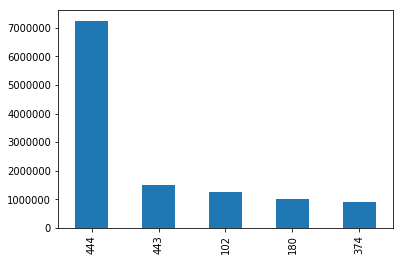

In [42]:
top_supporters.amount.plot.bar()

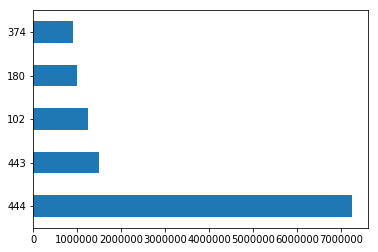

In [43]:
top_supporters.amount.plot.barh()

## Set Y-axis labels to the last names

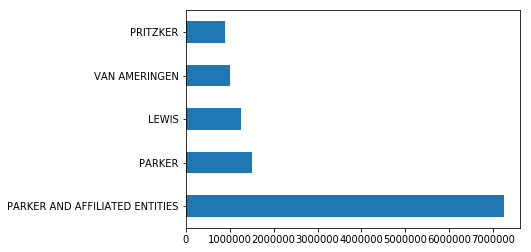

In [44]:
chart = top_supporters.amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_lastname)

## Set Y-axis labels to the full names

Do this by adding a new field to the DataFrame (new field is the combination of first and last name)

In [45]:
top_supporters['contributor_fullname'] = top_supporters.contributor_firstname + " " + top_supporters.contributor_lastname

In [46]:
top_supporters

,contributor_firstname,contributor_lastname,amount,contributor_fullname
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0,SEAN PARKER AND AFFILIATED ENTITIES
443,SEAN,PARKER,1500000.0,SEAN PARKER
102,DANIEL,LEWIS,1250000.0,DANIEL LEWIS
180,HENRY,VAN AMERINGEN,1000000.0,HENRY VAN AMERINGEN
374,NICHOLAS,PRITZKER,900000.0,NICHOLAS PRITZKER


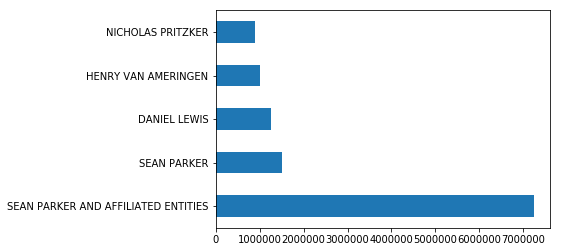

In [47]:
chart = top_supporters.amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_fullname)

## Export this data to csv file to work with it outside of Jupyter Notebook

In [48]:
top_supporters.to_csv("top_supporters.csv")

## Define function to clean "Sean Parker" columns

In [49]:
def combine_names(row):
    if row.contributor_fullname.startswith('SEAN PARKER'):
        return 'SEAN PARKER'
    else:
        return row.contributor_fullname

In [50]:
top_supporters.apply(combine_names, axis=1)

444            SEAN PARKER
443            SEAN PARKER
102           DANIEL LEWIS
180    HENRY VAN AMERINGEN
374      NICHOLAS PRITZKER
dtype: object

## Insert these values into new "clean" column

In [54]:
top_supporters["contributor_cleanname"] = top_supporters.apply(combine_names, axis=1)

In [55]:
top_supporters

,contributor_firstname,contributor_lastname,amount,contributor_fullname,contributor_cleanname
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0,SEAN PARKER AND AFFILIATED ENTITIES,SEAN PARKER
443,SEAN,PARKER,1500000.0,SEAN PARKER,SEAN PARKER
102,DANIEL,LEWIS,1250000.0,DANIEL LEWIS,DANIEL LEWIS
180,HENRY,VAN AMERINGEN,1000000.0,HENRY VAN AMERINGEN,HENRY VAN AMERINGEN
374,NICHOLAS,PRITZKER,900000.0,NICHOLAS PRITZKER,NICHOLAS PRITZKER


## Group by clean column

In [56]:
top_supporters.groupby("contributor_cleanname").amount.sum().reset_index().sort_values("amount", ascending=False)

,contributor_cleanname,amount
3,SEAN PARKER,8750000.0
0,DANIEL LEWIS,1250000.0
1,HENRY VAN AMERINGEN,1000000.0
2,NICHOLAS PRITZKER,900000.0
